### Using KNN

In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Load the data from pickle files

In [2]:
# Dataframe
with open('../Pickles/Content_Parsed.pickle', 'rb') as data:
    content_parsed = pickle.load(data)

# features_train
with open('../Pickles/features_train.pickle', 'rb') as data:
    features_train = pickle.load(data)

# labels_train
with open('../Pickles/labels_train.pickle', 'rb') as data:
    labels_train = pickle.load(data)

# features_test
with open('../Pickles/features_test.pickle', 'rb') as data:
    features_test = pickle.load(data)

# labels_test
with open('../Pickles/labels_test.pickle', 'rb') as data:
    labels_test = pickle.load(data)

In [3]:
#Create a KNN Classifier
clf = KNeighborsClassifier()

#Train the model using the training sets
clf.fit(features_train, labels_train)

#Predict the response for test dataset
labels_pred = clf.predict(features_test)

In [4]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", accuracy_score(labels_test, labels_pred))

Accuracy: 0.7247820672478207


In [5]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",precision_score(labels_test, labels_pred, average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",recall_score(labels_test, labels_pred, average='micro'))

Precision: 0.7247820672478207
Recall: 0.7247820672478207


### Hyperparameters
We will try to improve the accuracy using hyperparameters tuning

In [6]:
knnc_0 = KNeighborsClassifier()

print('Parameters currently in use:\n')
knnc_0.get_params()

Parameters currently in use:



{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## We'll tune the following hyperparameter:

* n_neighbors: Number of neighbors to use by default for queries.

### We will use 2 techniques:
* GridSearchCV
* RandomizedSearchCV

### GridSearchCV technique
This technique attempts to compute the optimum values of hyperparameters. It is an exhaustive search that is performed on the specific parameter values of a model. The model is also known as an estimator.

In [7]:
# Create the parameter grid 
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 500, num = 100)]

param_grid = {'n_neighbors': n_neighbors}

# Create a base model
knnc = KNeighborsClassifier()

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 3)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  3.1min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=3, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46,
                                         51, 56, 61, 66, 71, 76, 81, 86, 91, 96,
                                         101, 106, 111, 116, 121, 127, 132, 137,
                                         142, 147, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [8]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 1}

The mean accuracy of a model with these hyperparameters is:
0.7723270440251572


### Randomized Search cross validation

In [9]:
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 500, num = 100)]
param_grid = {'n_neighbors': n_neighbors}

knncr = KNeighborsClassifier()

random_search = RandomizedSearchCV(estimator=knncr,
                                   param_distributions=param_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=3)

random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'n_neighbors': [1, 6, 11, 16, 21, 26,
                                                        31, 36, 41, 46, 51, 56,
                                                        61, 66, 71, 76, 81, 86,
                                                        91, 96, 101, 106, 111,
                                                        116, 121, 127, 132, 137,
                                                        142, 147, ...]},
 

In [10]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_neighbors': 21}

The mean accuracy of a model with these hyperparameters is:
0.6651464944943577


In [11]:
best_knnc_model = grid_search.best_estimator_
best_knnc_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Fitting the model and predicting 

In [12]:
# Fitting the model
best_knnc_model.fit(features_train, labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [13]:
# Predicting the values
knn_pred = best_knnc_model.predict(features_test)

In [14]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_knnc_model.predict(features_train)))

The training accuracy is: 
0.9991690901537184


In [15]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, knn_pred))

The test accuracy is: 
0.8306351183063512


In [16]:
# Classification report
print("Classification report")
print(classification_report(labels_test, knn_pred))

Classification report
              precision    recall  f1-score   support

           1       0.64      0.52      0.57        48
          10       1.00      1.00      1.00        17
           2       0.72      0.74      0.73        46
           3       0.82      0.81      0.82       129
           4       0.88      0.75      0.81        85
           5       0.86      0.89      0.88       444
           6       0.60      0.86      0.71        14
           7       0.33      0.50      0.40         2
           8       1.00      0.89      0.94         9
           9       0.67      0.44      0.53         9

    accuracy                           0.83       803
   macro avg       0.75      0.74      0.74       803
weighted avg       0.83      0.83      0.83       803



In [17]:
# Creating confusion matrix
conf_matrix = confusion_matrix(labels_test, knn_pred)
conf_matrix

array([[ 25,   0,   2,   1,   0,  19,   0,   1,   0,   0],
       [  0,  17,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,   0,  34,   1,   2,   5,   0,   0,   0,   1],
       [  1,   0,   0, 105,   0,  23,   0,   0,   0,   0],
       [  0,   0,   0,   6,  64,  13,   1,   0,   0,   1],
       [  8,   0,  10,  15,   7, 397,   6,   1,   0,   0],
       [  0,   0,   0,   0,   0,   2,  12,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   8,   0],
       [  2,   0,   1,   0,   0,   2,   0,   0,   0,   4]])

In [18]:
category_codes = {'1' : 'Service Proxy troubleshooting / APIGW', 
          '2' : 'Onboarding generic queries',
          '3' : 'Assessment/rescore queries/early spec/exception requests',
          '4' : 'Access to Tool queries', 
          '5' : 'API Standards queries',
          '6' : 'zally',
          '7' : 'Client libs', 
          '8' : 'Jamstack content reviewer',
          '9' : 'Axon Queries',
          '10': 'Mastercard Developers Notification'}
# Passing the categories was a mess so created another df specifically for categories
df2 = pd.DataFrame({})
df2["Category"] = content_parsed["Category"]
df2["Category_code"] = content_parsed["Category"]
df2 = df2.replace({'Category_code':category_codes})
label = df2.sort_values(by=['Category']).drop_duplicates()
label

,Category,Category_code
1266,1,Service Proxy troubleshooting / APIGW
3180,10,Mastercard Developers Notification
1302,2,Onboarding generic queries
1706,3,Assessment/rescore queries/early spec/exceptio...
1322,4,Access to Tool queries
2466,5,API Standards queries
2099,6,zally
2271,7,Client libs
729,8,Jamstack content reviewer
1505,9,Axon Queries


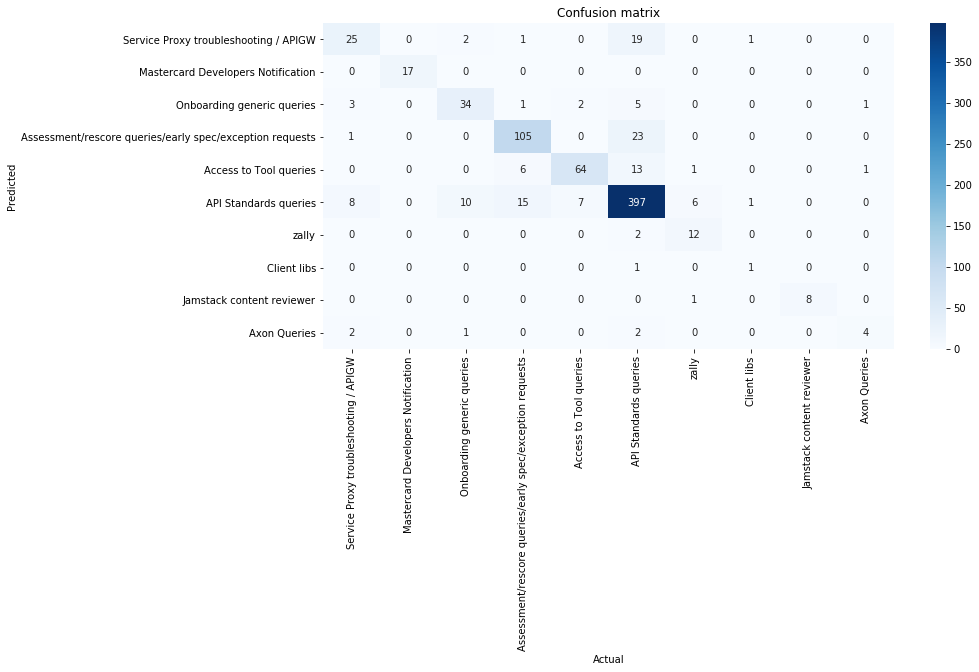

In [19]:
# Confusion matrix
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=label.Category_code, 
            yticklabels=label.Category_code,
            fmt='g',
            cmap="Blues"
            )
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [20]:
# We'll create a dataset with a model summary to compare models:
d = {
     'Model': 'KNN',
     'Training Set Accuracy': accuracy_score(labels_train, best_knnc_model.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, knn_pred)
}

df_models_knn = pd.DataFrame(d, index=[0])

In [21]:
df_models_knn

,Model,Training Set Accuracy,Test Set Accuracy
0,KNN,0.999169,0.830635


In [22]:
with open('Models/best_knn.pickle', 'wb') as output:
    pickle.dump(best_knnc_model, output)
    
with open('Models/df_models_knn.pickle', 'wb') as output:
    pickle.dump(df_models_knn, output)